In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from sklearn.linear_model import SGDRegressor

Learned coefficients: [2.23499724]
Learned intercept: [0.04960979]


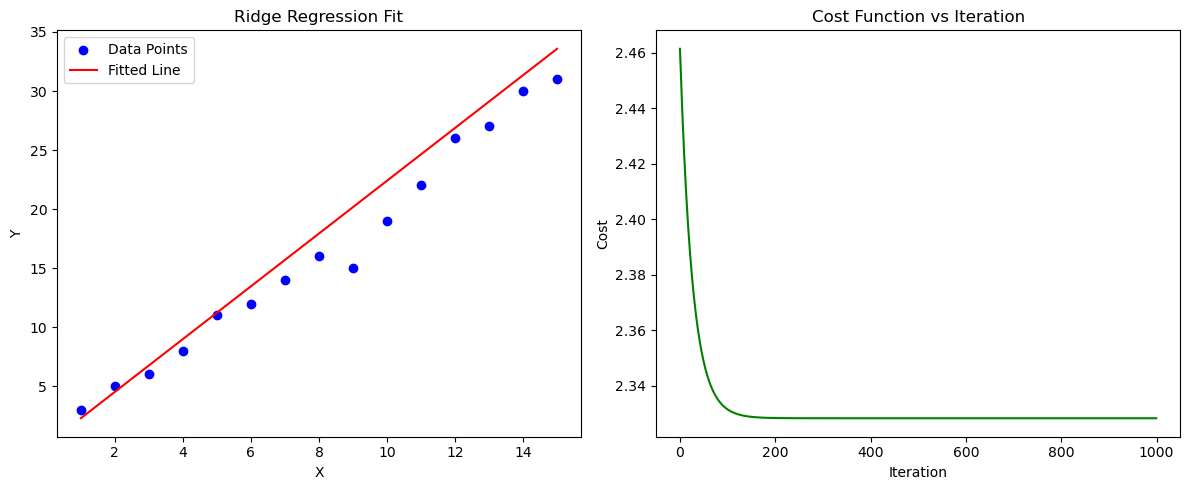

In [1]:
def main():
    # Hide the main tkinter window.
    root = Tk()
    root.withdraw()

    # Open file dialog to select a CSV file.
    file_path = askopenfilename(title="Select CSV File", filetypes=[("CSV files", "*.csv")])
    if not file_path:
        print("No file selected. Exiting.")
        return

    # Read CSV data (each row is a sample;
    # first n columns are independent variables, and the last column is the target variable).
    data = pd.read_csv(file_path)

    # Specify the number of independent variables (features) to use.
    # For visualization of a fitted line, n_features = 1.
    n_features = 1  # Change this value as needed.

    # Extract independent variables (X) and dependent variable (y).
    X = data.iloc[:, :n_features].values
    y = data.iloc[:, -1].values

    m = X.shape[0]  # number of samples

    # Ridge regression parameters.
    alpha = 0.001         # Regularization strength
    learning_rate = 0.01
    n_iterations = 1000

    # Initialize the SGDRegressor.
    # Note: With penalty='l2', SGDRegressor performs ridge regression.
    # We set max_iter=1 and warm_start=True so that we can call partial_fit in a loop.
    model = SGDRegressor(penalty='l2',
                         alpha=alpha,
                         learning_rate='constant',
                         eta0=learning_rate,
                         fit_intercept=True,
                         max_iter=1,
                         tol=None,
                         warm_start=True,
                         random_state=42)

    cost_history = []

    # Iterative training using partial_fit.
    # This allows us to record the cost at each iteration.
    for i in range(n_iterations):
        # Perform one epoch of training.
        model.partial_fit(X, y)

        # Predict on the training set.
        predictions = model.predict(X)

        # Compute mean squared error.
        mse = np.sum((y - predictions) ** 2) / (2 * m)
        # Compute L2 regularization cost (do not regularize the intercept).
        reg_cost = (alpha / (2 * m)) * np.sum(model.coef_ ** 2)
        # Total cost.
        cost = mse + reg_cost
        cost_history.append(cost)

    print("Learned coefficients:", model.coef_)
    print("Learned intercept:", model.intercept_)

    # Plotting the results.
    plt.figure(figsize=(12, 5))

    # Subplot 1: Scatter plot and fitted line (works for 1 feature).
    plt.subplot(1, 2, 1)
    plt.scatter(X, y, color="blue", label="Data Points")
    if n_features == 1:
        # Create a range of values for X to plot the fitted line.
        x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        y_vals = model.predict(x_vals)
        plt.plot(x_vals, y_vals, color="red", label="Fitted Line")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ridge Regression Fit")
    plt.legend()

    # Subplot 2: Cost function vs. iteration.
    plt.subplot(1, 2, 2)
    plt.plot(range(n_iterations), cost_history, color="green")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title("Cost Function vs Iteration")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
